In [1]:
from preamble import *
%matplotlib inline

# Hands-on Machine Learning with Python (sklearn)
Joaquin Vanschoren

# scikit-learn
One of the most prominent Python libraries for machine learning:

* Contains many state-of-the-art machine learning algorithms
* Builds on numpy (fast), implements advanced techniques
* Wide range of evaluation measures and techniques
* Offers [comprehensive documentation](http://scikit-learn.org/stable/documentation) about each algorithm
* Widely used, and a wealth of [tutorials](http://scikit-learn.org/stable/user_guide.html) and code snippets are available 
* Works well with numpy, scipy, pandas, matplotlib,...

## Algorithms
See the [Reference](http://scikit-learn.org/dev/modules/classes.html)

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Classification/Regression Trees, Random Forests,...)
* Nearest neighbors
* Neural networks 
* Gaussian Processes
* Feature selection

__Unsupervised learning:__
    
* Clustering (KMeans, ...)
* Matrix Decomposition (PCA, ...)
* Manifold Learning (Embeddings)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

## Data import
Multiple options:

* A few toy datasets are included in `sklearn.datasets`
* Import [1000s of datasets](http://www.openml.org) via `sklearn.datasets.fetch_openml`
* You can import data files (CSV) with `pandas` or `numpy`

In [2]:
from sklearn.datasets import load_iris, fetch_openml
iris_data = load_iris()
dating_data = fetch_openml("SpeedDating")

These will return a `Bunch` object (similar to a `dict`)

In [3]:
print("Keys of iris_dataset: {}".format(iris_data.keys()))
print(iris_data['DESCR'][:193] + "\n...")

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


* Targets (classes) and features are lists of strings
* Data and target values are always numeric (ndarrays)

In [4]:
print("Targets: {}".format(iris_data['target_names']))
print("Features: {}".format(iris_data['feature_names']))
print("Shape of data: {}".format(iris_data['data'].shape))
print("First 5 rows:\n{}".format(iris_data['data'][:5]))
print("Targets:\n{}".format(iris_data['target']))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Building models
All scikitlearn _estimators_ follow the same interface

```python
class SupervisedEstimator(...):
    def __init__(self, hyperparam, ...):

    def fit(self, X, y):   # Fit/model the training data
        ...                # given data X and targets y
        return self
     
    def predict(self, X):  # Make predictions
        ...                # on unseen data X  
        return y_pred
    
    def score(self, X, y): # Predict and compare to true
        ...                # labels y                
        return score
```

### Training and testing data
To evaluate our classifier, we need to test it on unseen data.  
`train_test_split`: splits data randomly in 75% training and 25% test data.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data['data'], iris_data['target'], 
    random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


We can also choose other ways to split the data. For instance, the following will create a training set of 10% of the data and a test set of 5% of the data. This is useful when dealing with very large datasets. `stratify` defines the target feature to stratify the data (ensure that the class distributions are kept the same).

In [6]:
X, y = iris_data['data'], iris_data['target']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X,y, stratify=y, train_size=0.1, test_size=0.05)
print("Xs_train shape: {}".format(Xs_train.shape))
print("Xs_test shape: {}".format(Xs_test.shape))

Xs_train shape: (15, 4)
Xs_test shape: (8, 4)


### Fitting a model

The first model we'll build is a k-Nearest Neighbor classifier.  
kNN is included in `sklearn.neighbors`, so let's build our first model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Making predictions
Let's create a new example and ask the kNN model to classify it

In [9]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_data['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the model
Feeding all test examples to the model yields all predictions

In [10]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


The `score` function computes the percentage of correct predictions

``` python
knn.score(X_test, y_test)
```

In [11]:
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))

Score: 0.97


Instead of a single train-test split, we can use `cross_validate` do run a cross-validation. 
It will return the test scores, as well as the fit and score times, for every fold.
By default, scikit-learn does a 5-fold cross-validation, hence returning 5 test scores.

In [20]:
from sklearn.model_selection import cross_validate
xval = cross_validate(knn, X, y, return_train_score=True, n_jobs=-1)
xval

{'fit_time': array([0.001, 0.001, 0.001, 0.001, 0.001]),
 'score_time': array([0.002, 0.002, 0.002, 0.002, 0.002]),
 'test_score': array([0.967, 0.967, 0.933, 0.933, 1.   ]),
 'train_score': array([1., 1., 1., 1., 1.])}

The mean should give a better performance estimate

In [18]:
np.mean(xval['test_score'])

0.96

### Introspecting the model
Most models allow you to retrieve the trained model parameters, usually called `coef_`

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr.coef_

array([-0.153, -0.025,  0.267,  0.574])

Matching these with the names of the features, we can see which features are primarily used by the model

In [14]:
d = zip(iris_data.feature_names,lr.coef_)
set(d)

{('petal length (cm)', 0.2669801292888398),
 ('petal width (cm)', 0.5738618608875328),
 ('sepal length (cm)', -0.15330145645467907),
 ('sepal width (cm)', -0.02540761074550385)}

## Evaluation procedures
### Holdout
The simplest procedure is [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), which splits arrays or matrices into random train and test subsets.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(centers=2, random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate a model and fit it to the training set
model = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Test set score: 0.92


### Cross-validation
- [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross%20val%20score#sklearn.model_selection.cross_val_score)
    - `cv` parameter defines the kind of cross-validation splits, default is 5-fold CV
    - `scoring` defines the scoring metric. Also see below.
    - Returns list of all scores. Models are built internally, but not returned
- [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html?highlight=cross%20validate#sklearn.model_selection.cross_validate)
    - Similar, but also returns the fit and test times, and allows multiple scoring metrics.

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Variance in cross-validation score: {:.4f}".format(np.var(scores)))

Cross-validation scores: [0.967 1.    0.933 0.967 1.   ]
Average cross-validation score: 0.97
Variance in cross-validation score: 0.0006


### Custom CV splits
- You can build folds manually with [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold) or [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)
    - randomizable (`shuffle` parameter)
- [LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html?highlight=leave%20one%20out#sklearn.model_selection.LeaveOneOut) does leave-one-out cross-validation

In [4]:
from sklearn.model_selection import KFold, StratifiedKFold
kfold = KFold(n_splits=5)
print("Cross-validation scores KFold(n_splits=5):\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))
skfold = StratifiedKFold(n_splits=5, shuffle=True)
print("Cross-validation scores StratifiedKFold(n_splits=5, shuffle=True):\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=skfold)))

Cross-validation scores KFold(n_splits=5):
[1.    1.    0.867 0.933 0.833]
Cross-validation scores StratifiedKFold(n_splits=5, shuffle=True):
[0.967 0.933 0.967 0.967 0.967]


In [5]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


### Shuffle-split
These shuffle the data before splitting it.
- `ShuffleSplit` and `StratifiedShuffleSplit` (recommended for classification)
- `train_size` and `test_size` can be absolute numbers or a percentage of the total dataset

In [6]:
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.973 0.973 0.973 0.96  0.973 0.973 0.947 0.933 0.973 0.987]


#### Grouped cross-validation
- Add an array with group membership to `cross_val_scores` 
- Use `GroupKFold` with the number of groups as CV procedure

In [7]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# the first three samples belong to the same group, etc.
groups = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=4))
print("cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=4)")
print("Cross-validation scores :\n{}".format(scores))

cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=4)
Cross-validation scores :
[0.667 0.667 1.    0.667]


## Evaluation Metrics

#### Binary classification
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) returns a matrix counting how many test examples are predicted correctly or 'confused' with other metrics.
- [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics) contains implementations many of the metrics discussed in class
    - They are all implemented so that 'higher is better'. 
- [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) computes accuracy explictly
- [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) returns a table of binary measures, per class, and aggregated according to different aggregation functions.

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("confusion_matrix(y_test, y_pred): \n", confusion_matrix(y_test, y_pred))
print("accuracy_score(y_test, y_pred): ", accuracy_score(y_test, y_pred))
print("model.score(X_test, y_test): ", lr.score(X_test, y_test))

confusion_matrix(y_test, y_pred): 
 [[48  5]
 [ 5 85]]
accuracy_score(y_test, y_pred):  0.9300699300699301
model.score(X_test, y_test):  0.9300699300699301


In [9]:
plt.rcParams['figure.dpi'] = 100 
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.94      0.94      0.94        90

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



You can explictly define the averaging function for class-level metrics 

In [10]:
pred = lr.predict(X_test)
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Weighted average f1 score: {:.3f}".format(f1_score(y_test, pred, average="weighted")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.930
Weighted average f1 score: 0.930
Macro average f1 score: 0.925


#### Probabilistic predictions
To retrieve the uncertainty in the prediction, scikit-learn offers 2 functions. Often, both are available for every learner, but not always.

- decision_function: returns floating point (-Inf,Inf) value for each prediction
- predict_proba: returns probability [0,1] for each prediction

You can also use these to compute any metric with non-standard thresholds

In [11]:
print("Threshold -0.8")
y_pred_lower_threshold = lr.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))  

Threshold -0.8
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        53
           1       0.94      0.97      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### Precision-Recall and ROC curves

- [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html?highlight=precision_recall_curve) returns all precision and recall values for all possible thresholds
- [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc%20curve#sklearn.metrics.roc_curve) does the same for TPR and FPR.
- The average precision score is returned by the `average_precision_score` measure 
- The area under the ROC curve is returned by the `roc_auc_score` measure 
    - Don't use `auc` (this uses a less accurate trapezoidal rule)
    - Require a decision function or predict_proba.
    

In [12]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, lr.decision_function(X_test)) 

In [13]:
from sklearn.metrics import average_precision_score
ap_pp = average_precision_score(y_test, lr.predict_proba(X_test)[:, 1])
ap_df = average_precision_score(y_test, lr.decision_function(X_test))
print("Average precision of logreg: {:.3f}".format(ap_df))

Average precision of logreg: 0.996


In [14]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, lr.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.992
AUC for SVC: 0.992


In [15]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Weighted average f1 score: {:.3f}".format(f1_score(y_test, pred, average="weighted")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.930
Weighted average f1 score: 0.930
Macro average f1 score: 0.925


## Using evaluation metrics in model selection

- You typically want to use AUC or other relevant measures in `cross_val_score` and `GridSearchCV` instead of the default accuracy.
- scikit-learn makes this easy through the `scoring` argument
    - But, you need to need to look the [mapping between the scorer and the metric](http://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)

![scorers](../images/03_scoring.png)

Or simply look up like this:

In [16]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


Cross-validation with AUC

In [17]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn .svm import SVC
from sklearn.datasets import load_digits
digits = load_digits()

# default scoring for classification is accuracy
print("Default scoring: {}".format(
      cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9, 
                                     scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975 0.992 1.    0.994 0.981]
Explicit accuracy scoring: [0.975 0.992 1.    0.994 0.981]
AUC scoring: [0.997 0.999 1.    1.    0.984]


## Hyperparameter tuning
Now that we know how to evaluate models, we can improve them by tuning their hyperparameters

#### Grid search
- Create a parameter grid as a dictionary
    - Keys are parameter names
    - Values are lists of hyperparameter values

In [18]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


- `GridSearchCV`: like a classifier that uses CV to automatically optimize its hyperparameters internally
    - Input: (untrained) model, parameter grid, CV procedure
    - Output: optimized model on given training data
    - Should only have access to training data

In [19]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The optimized test score and hyperparameters can easily be retrieved:

In [20]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [21]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [22]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


When hyperparameters depend on other parameters, we can use lists of dictionaries to define the hyperparameter space

In [23]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


#### Nested cross-validation

- Nested cross-validation:
    - Outer loop: split data in training and test sets
    - Inner loop: run grid search, splitting the training data into train and validation sets
- Result is a just a list of scores
    - There will be multiple optimized models and hyperparameter settings (not returned)
- To apply on future data, we need to train `GridSearchCV` on all data again

In [24]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.9   0.967 1.   ]
Mean cross-validation score:  0.9666666666666668


#### Parallelizing cross-validation and grid-search
- On a practical note, it is easy to parallellize CV and grid search
- `cross_val_score` and `GridSearchCV` have a `n_jobs` parameter defining the number of cores it can use.
    - set it to `n_jobs=-1` to use all available cores.

### Random Search
- `RandomizedSearchCV` works like `GridSearchCV`
- Has `n_iter` parameter for the number of iterations
- Search grid can use distributions instead of fixed lists

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

param_grid = {'C': expon(scale=100), 
              'gamma': expon(scale=.1)}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid,
                                   n_iter=20)
X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, random_state=0)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11d558828>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11d558eb8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

## Building Pipelines
* In scikit-learn, a `pipeline` combines multiple processing _steps_ in a single estimator
* All but the last step should be transformer (have a `transform` method)
    * The last step can be a transformer too (e.g. Scaler+PCA)
* It has a `fit`, `predict`, and `score` method, just like any other learning algorithm
* Pipelines are built as a list of steps, which are (name, algorithm) tuples
    * The name can be anything you want, but can't contain `'__'`
    * We use `'__'` to refer to the hyperparameters, e.g. `svm__C`
* Let's build, train, and score a `MinMaxScaler` + `LinearSVC` pipeline:

``` python
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", LinearSVC())])
pipe.fit(X_train, y_train).score(X_test, y_test)
```

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", LinearSVC())])

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
pipe.fit(X_train, y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.97


* Now with cross-validation:
``` python
scores = cross_val_score(pipe, cancer.data, cancer.target)
```

In [3]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, cancer.data, cancer.target)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.982 0.974 0.965 0.965 0.991]
Average cross-validation score: 0.98


* We can retrieve the trained SVM by querying the right step indices
``` python
pipe.steps[1][1]
```

In [4]:
pipe.fit(X_train, y_train)
print("SVM component: {}".format(pipe.steps[1][1]))

SVM component: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


* Or we can use the `named_steps` dictionary
``` python
pipe.named_steps['svm']
```

In [5]:
print("SVM component: {}".format(pipe.named_steps['svm']))

SVM component: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


* When you don't need specific names for specific steps, you can use `make_pipeline`
    * Assigns names to steps automatically
``` python
pipe_short = make_pipeline(MinMaxScaler(), LinearSVC(C=100))
print("Pipeline steps:\n{}".format(pipe_short.steps))
```

In [6]:
from sklearn.pipeline import make_pipeline
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), LinearSVC(C=100))
print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('linearsvc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]


Visualization of a pipeline `fit` and `predict`

<img src="../images/07_pipelines.png" alt="ml" style="width: 700px;"/>

### Using Pipelines in Grid-searches
* We can use the pipeline as a single estimator in `cross_val_score` or `GridSearchCV`
* To define a grid, refer to the hyperparameters of the steps
    * Step `svm`, parameter `C` becomes `svm__C`

In [7]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [8]:
from sklearn import pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipe = pipeline.Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.97
Test set score: 0.97
Best parameters: {'svm__C': 10, 'svm__gamma': 1}


* When we request the best estimator of the grid search, we'll get the best pipeline
``` python
grid.best_estimator_
```

In [9]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


* And we can drill down to individual components and their properties
``` python
grid.best_estimator_.named_steps["svm"]
```

In [10]:
# Get the SVM
print("SVM step:\n{}".format(
      grid.best_estimator_.named_steps["svm"]))

SVM step:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [11]:
# Get the SVM dual coefficients (support vector weights)
print("SVM support vector coefficients:\n{}".format(
      grid.best_estimator_.named_steps["svm"].dual_coef_))

SVM support vector coefficients:
[[ -1.392  -4.069  -0.435  -0.7    -5.865  -0.414  -2.814 -10.    -10.
   -3.418  -7.908  -0.169  -4.299  -1.137  -2.214  -0.19  -10.     -7.128
  -10.     -0.522  -3.766  -0.012  -1.159 -10.     -0.513  -0.712 -10.
   -1.501 -10.     10.      1.995   0.909   0.919   2.897   0.399  10.
    9.811   0.412  10.     10.     10.      5.415   0.83    2.593   1.371
   10.      0.279   1.555   6.589   1.487  10.      1.156   0.391   2.663
    1.277   0.651   1.841   2.395   2.504]]


### Grid-searching preprocessing steps and model parameters
* We can use grid search to optimize the hyperparameters of our preprocessing steps and learning algorithms at the same time
* Consider the following pipeline:
    - `StandardScaler`, without hyperparameters
    - `PolynomialFeatures`, with the max. _degree_ of polynomials
    - `Ridge` regression, with L2 regularization parameter _alpha_

In [12]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)
from sklearn.preprocessing import PolynomialFeatures
pipe = pipeline.make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

* We don't know the optimal polynomial degree or alpha value, so we use a grid search (or random search) to find the optimal values
``` python
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=1)
grid.fit(X_train, y_train)
```

In [13]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# Note: I had to use n_jobs=1. (n_jobs=-1 stalls on my machine)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=1)
grid.fit(X_train, y_train);

* Visualing the $R^2$ results as a heatmap:

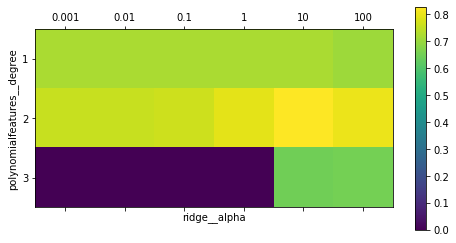

In [14]:
import matplotlib.pyplot as plt

plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
            vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
           param_grid['polynomialfeatures__degree'])

plt.colorbar();

* Here, degree-2 polynomials help (but degree-3 ones don't), and tuning the alpha parameter helps as well.
* Not using the polynomial features leads to suboptimal results (see the results for degree 1)

In [15]:
print("Best parameters: {}".format(grid.best_params_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
Test-set score: 0.77


### FeatureUnions
- Sometimes you want to apply multiple preprocessing techniques and use the _combined_ produced features
- Simply appending the produced features is called a `FeatureJoin`
- Example: Apply both PCA and feature selection, and run an SVM on both

In [16]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

iris = load_iris()

X, y = iris.data, iris.target

# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)
print("Combined space has", X_features.shape[1], "features")

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Combined space has 3 features
Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('pca',
                                                 PCA(copy=True,
                                                     iterated_power='auto',
                                                     n_components=3,
                                                     random_state=None,
                                                     svd_solver='auto', tol=0.0,
                                                     whiten=False)),
                                                ('univ_select',
                                                 SelectKBest(k=1,
                                                             score_func=<function f_classif at 0x123dfe2f0>))],
                              transformer_weights=None, verbose=False)),
                ('svm',
                 SVC(C=10, break_ties=False, cache

### ColumnTransformer
- A pipeline applies a transformer on _all_ columns
    - If your dataset has both numeric and categorical features, you often want to apply different techniques on each
    - You _could_ manually split up the dataset, and then feature-join the processed features (tedious)
- `ColumnTransformer` allows you to specify on which columns a preprocessor has to be run
    - Either by specifying the feature names, indices, or a binary mask
- You can include multiple transformers in a ColumnTransformer
    - In the end the results will be feature-joined
    - Hence, the order of the features will change!
        The features of the last transformer will be at the end
- Each transformer can be a pipeline
    - Handy if you need to apply multiple preprocessing steps on a set of features
    - E.g. use a ColumnTransformer with one sub-pipeline for numerical features and one for categorical features.
- In the end, the columntransformer can again be included as part of a pipeline
    - E.g. to add a classfier and include the whole pipeline in a grid search

Example: Handle a dataset (Titanic) with both categorical an numeric features
- Numeric features: impute missing values and scale
- Categorical features: Impute missing values and apply one-hot-encoding
- Finally, run an SVM

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Load data from https://www.openml.org/d/40945
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Alternatively X and y can be obtained directly from the frame attribute:
# X = titanic.frame.drop('survived', axis=1)
# y = titanic.frame['survived']

# We will train our classifier with the following features:
# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.790


You can again run optimize any of the hyperparameters (preprocessing-related ones included) in a grid search

In [18]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print(("best logistic regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best logistic regression from grid search: 0.798
